In [37]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme()
print("run")

run


In [9]:
PATH = "train.csv"  
df = pd.read_csv(PATH)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
print("Shape:", df.shape)

Shape: (891, 12)


In [12]:
print("\nInfo:\n"); df.info()



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
display(df.describe(include='all'))     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
print("\nUnique counts:\n", df.nunique())


Unique counts:
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [15]:
miss = df.isna().sum().sort_values(ascending=False)
display(miss[miss>0])

Cabin       687
Age         177
Embarked      2
dtype: int64

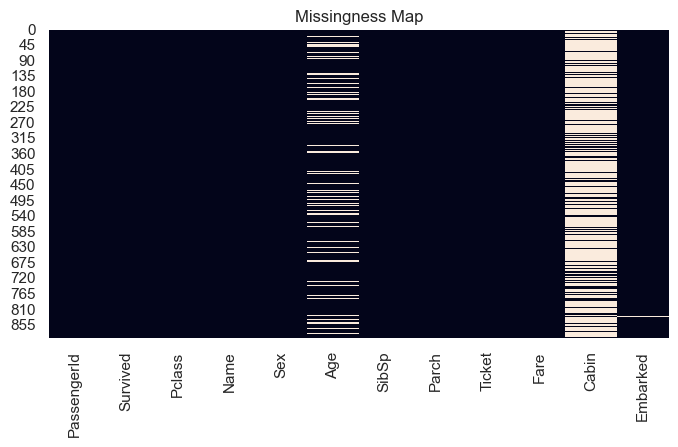

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Map")
plt.show()

In [17]:
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols, num_cols


(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

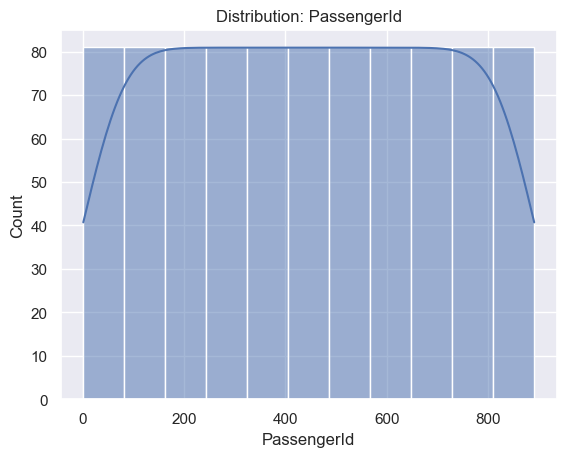

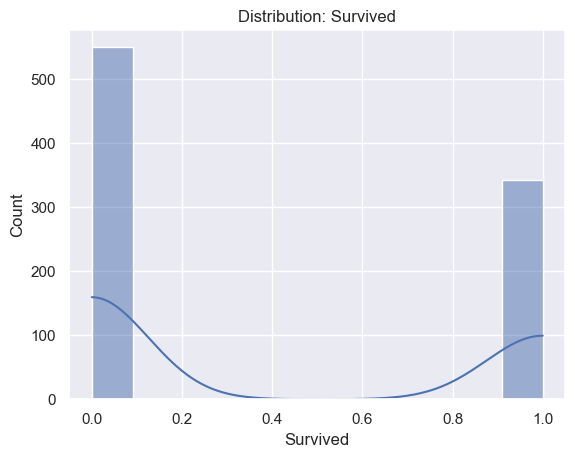

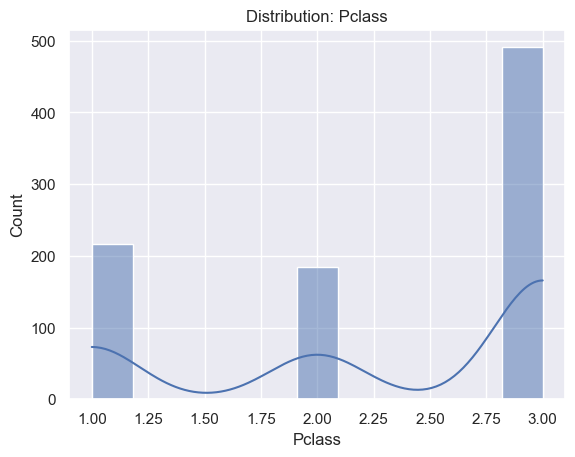

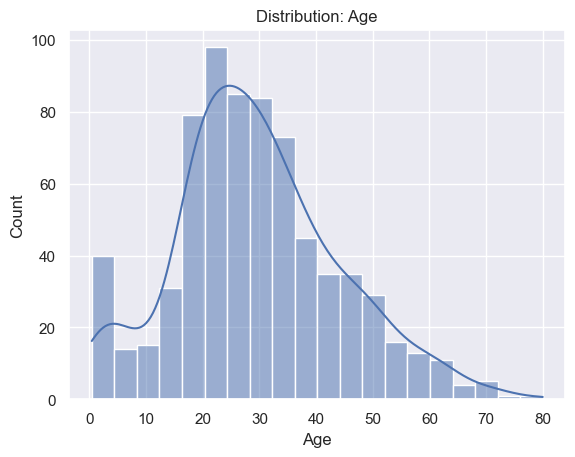

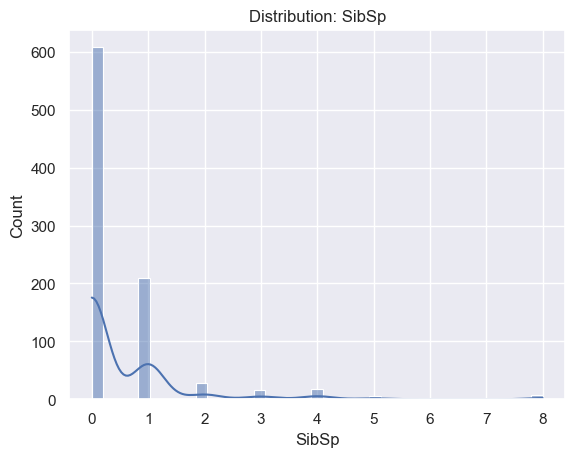

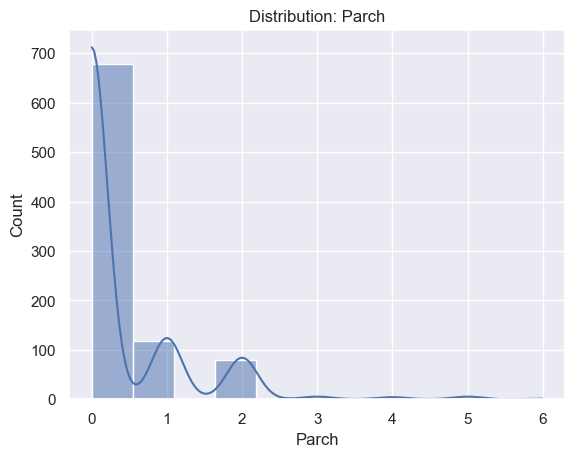

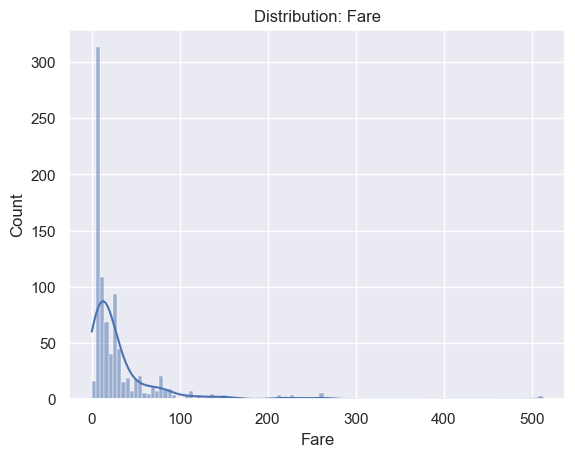

In [18]:
for c in num_cols:
    plt.figure()
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f"Distribution: {c}")
    plt.show()

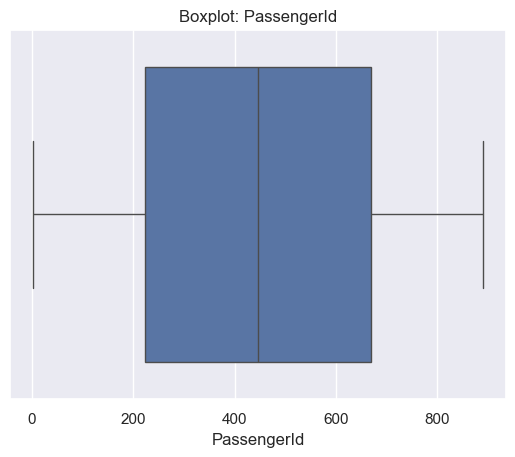

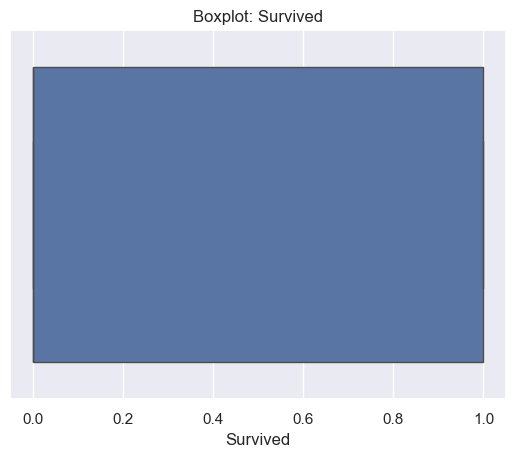

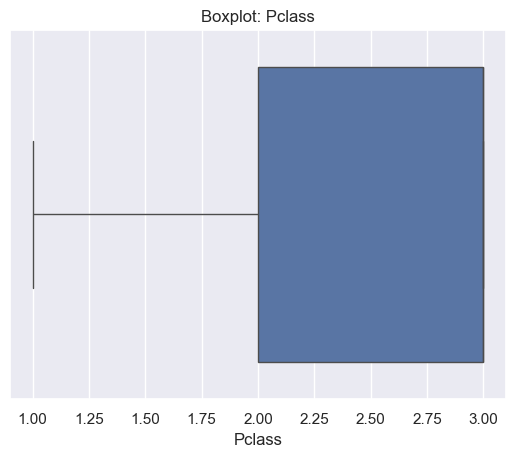

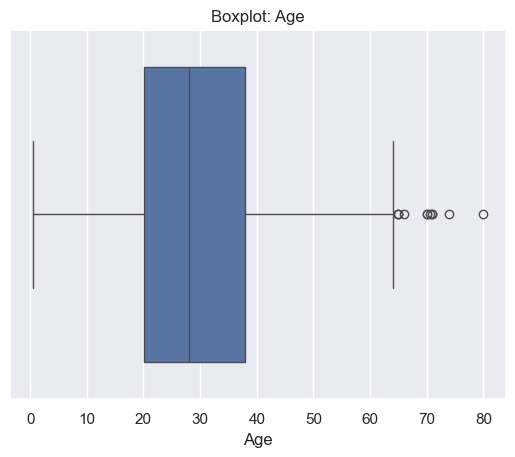

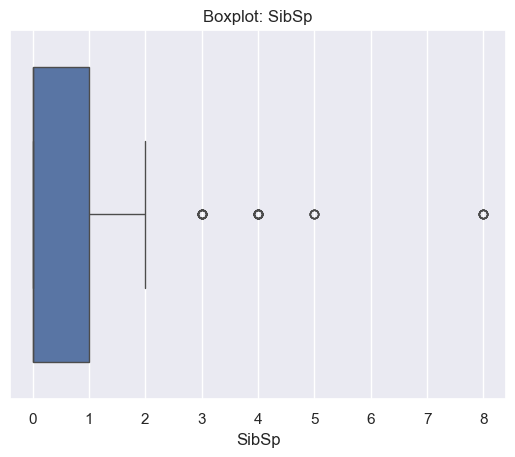

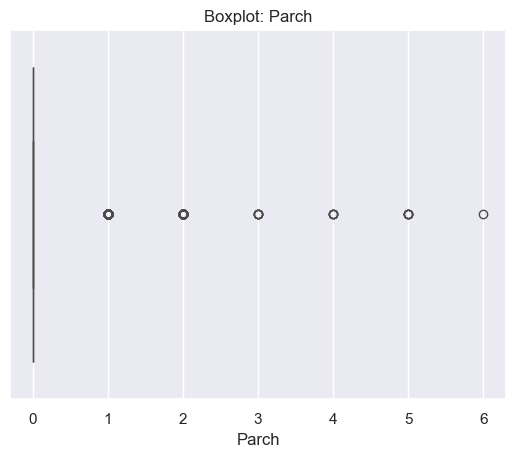

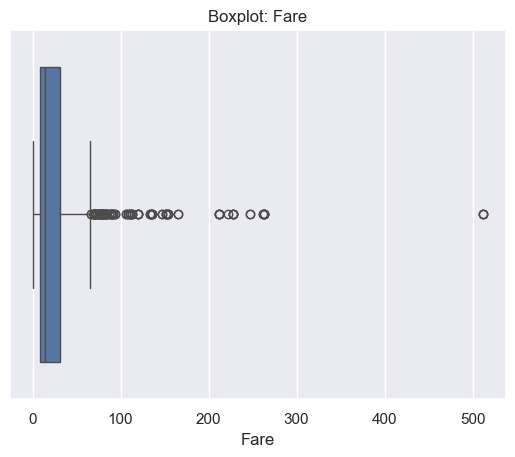

In [25]:
for b in num_cols:
    plt.figure()
    sns.boxplot(x=df[b])
    plt.title(f"Boxplot: {b}")
    plt.show()

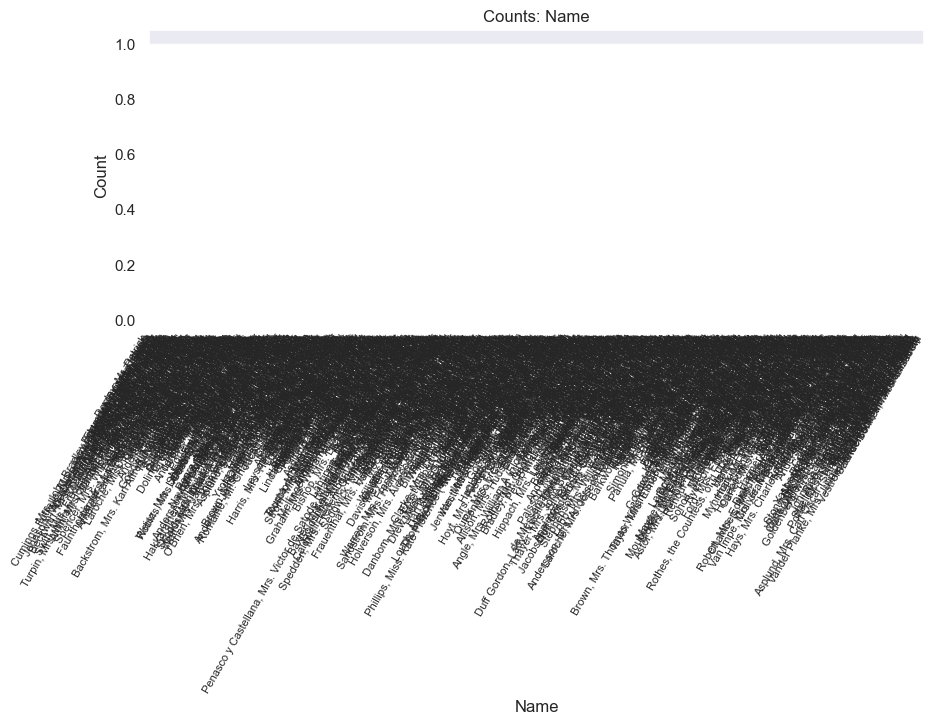

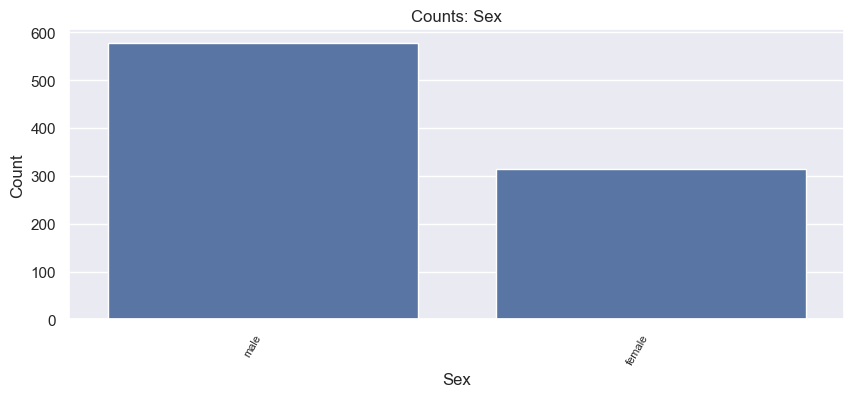

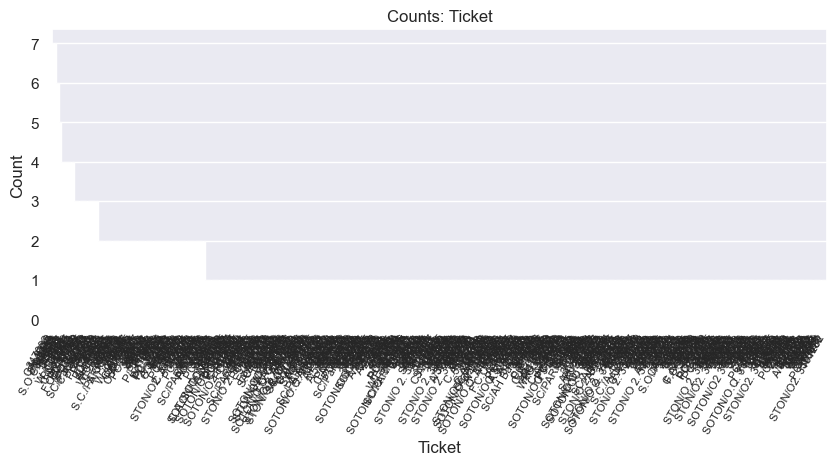

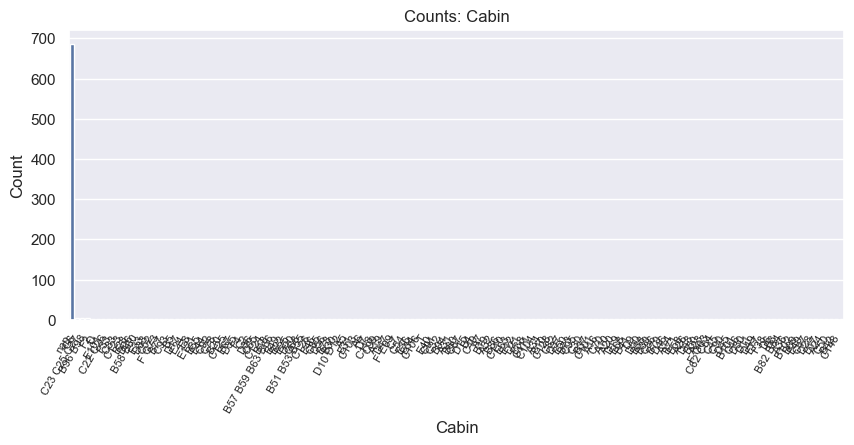

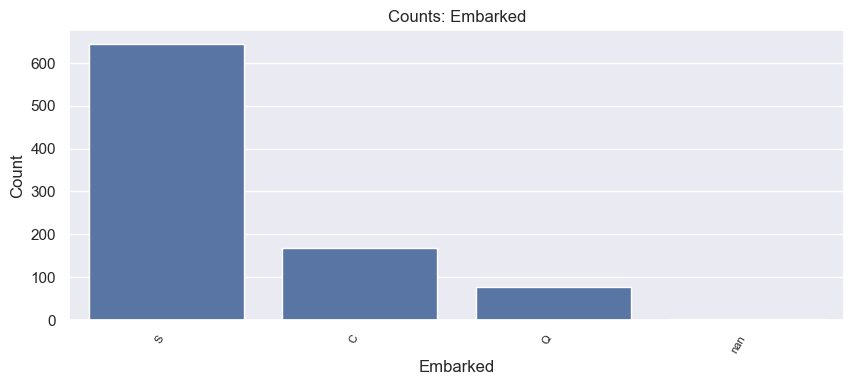

In [31]:
for c in cat_cols:
    plt.figure(figsize=(10,5))  
    vc = df[c].astype(str).value_counts(dropna=False)
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f"Counts: {c}")
    plt.xticks(rotation=60, ha='right', fontsize=8)
    plt.ylabel("Count")
    plt.subplots_adjust(bottom=0.3)  
    plt.show()


Target: Survived


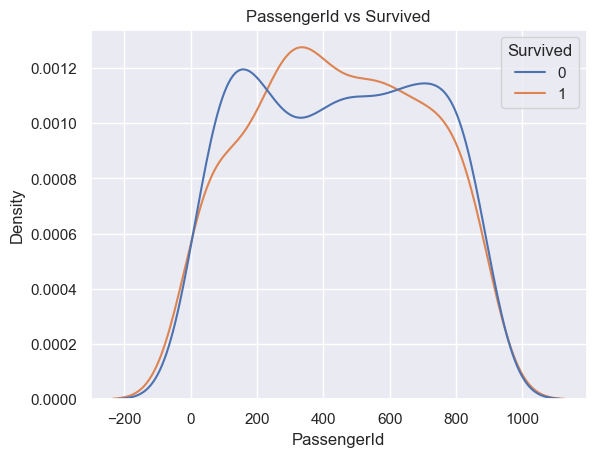

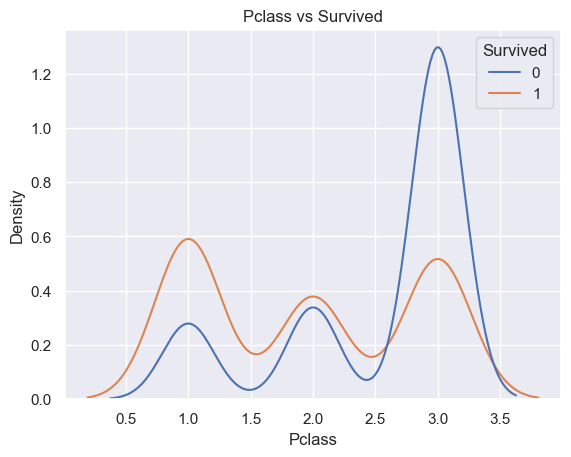

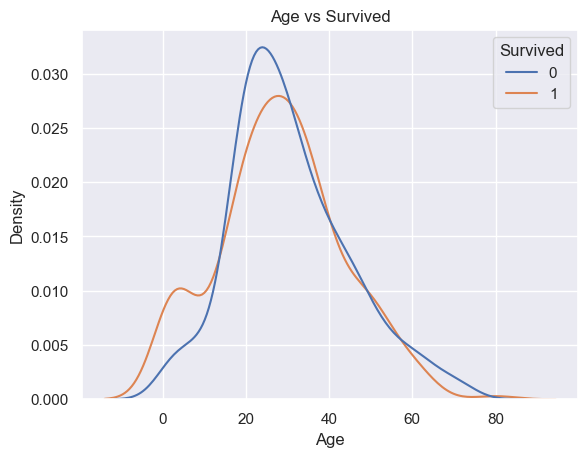

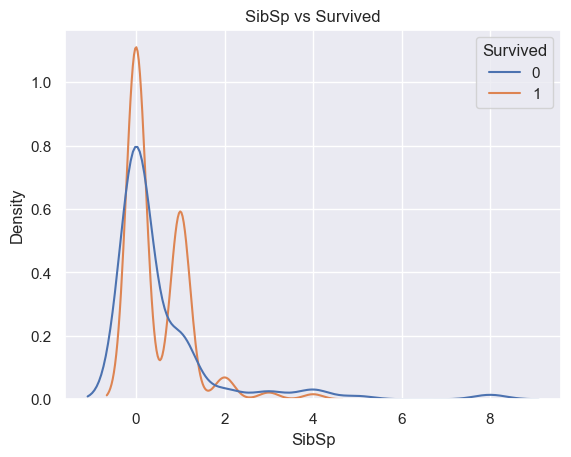

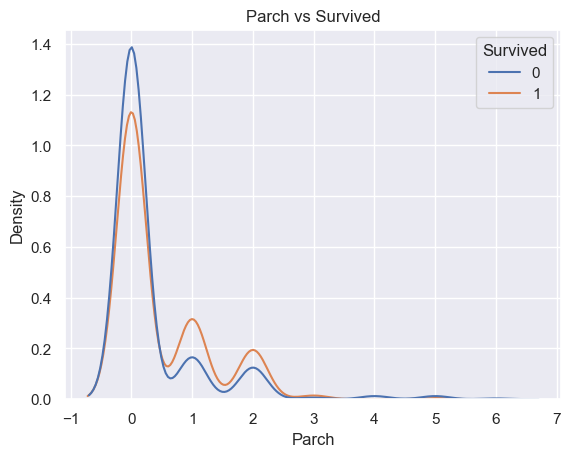

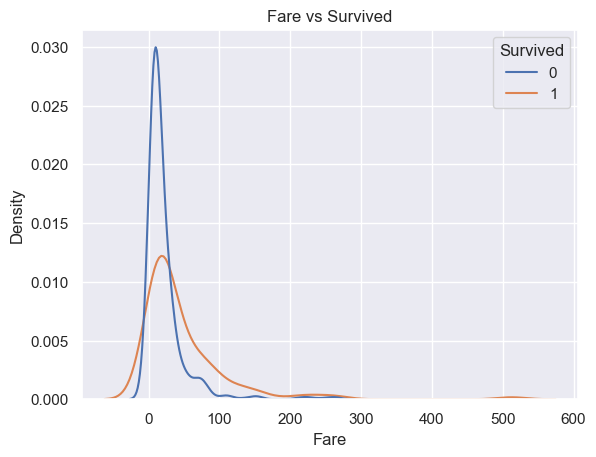

C:\Users\Pravin\AppData\Local\Temp\ipykernel_11136\2404678324.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


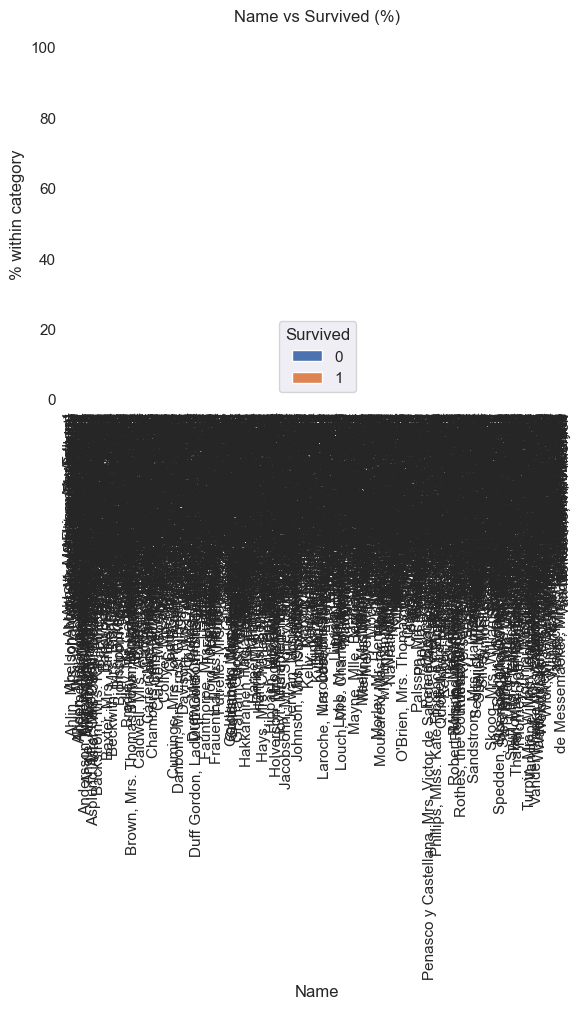

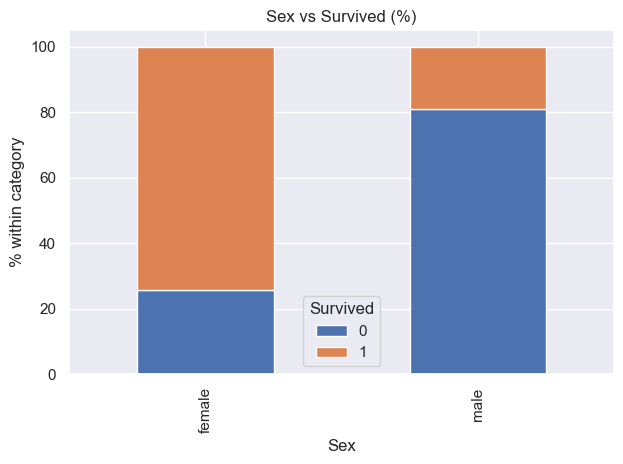

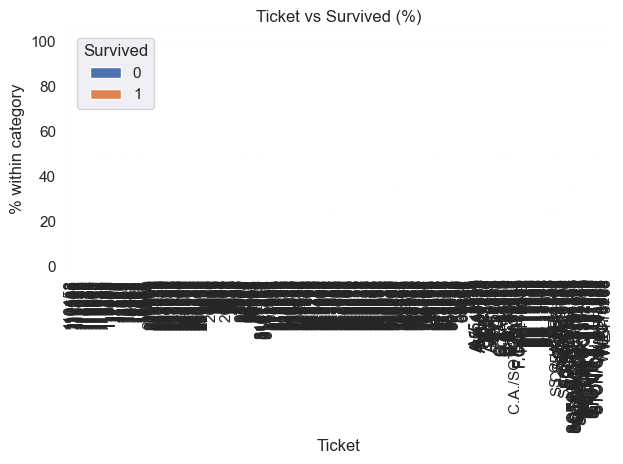

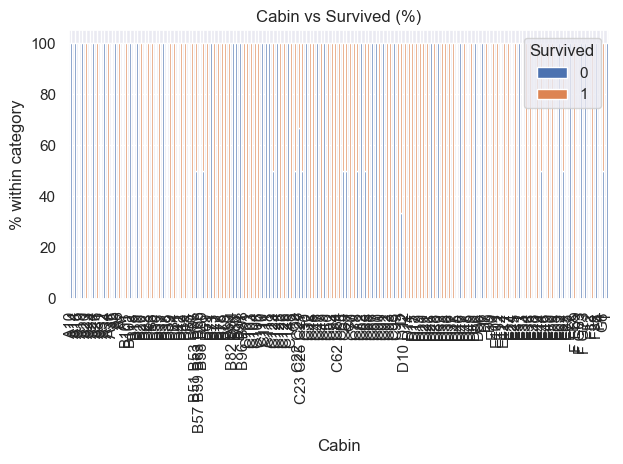

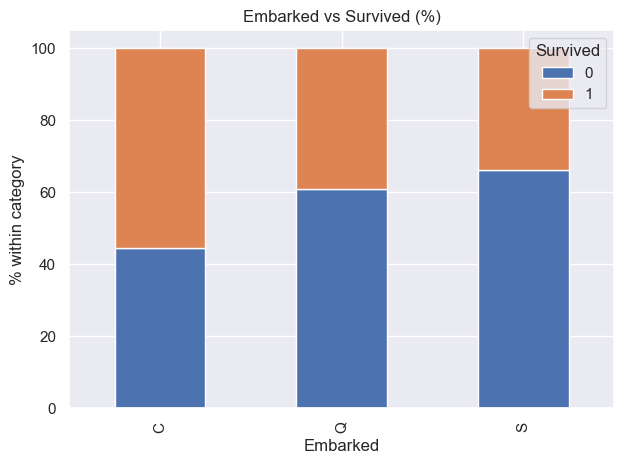

In [32]:
target = 'Survived' if 'Survived' in df.columns else None
print("Target:", target)

if target:
    # numeric vs target (density by class)
    for c in [x for x in num_cols if x != target]:
        plt.figure()
        sns.kdeplot(data=df, x=c, hue=target, common_norm=False)
        plt.title(f"{c} vs {target}")
        plt.show()

    # categorical vs target (stacked %)
    for c in cat_cols:
        ct = pd.crosstab(df[c], df[target], normalize='index')*100
        ax = ct.plot(kind='bar', stacked=True)
        plt.ylabel("% within category")
        plt.title(f"{c} vs {target} (%)")
        plt.legend(title=target)
        plt.tight_layout()
        plt.show()


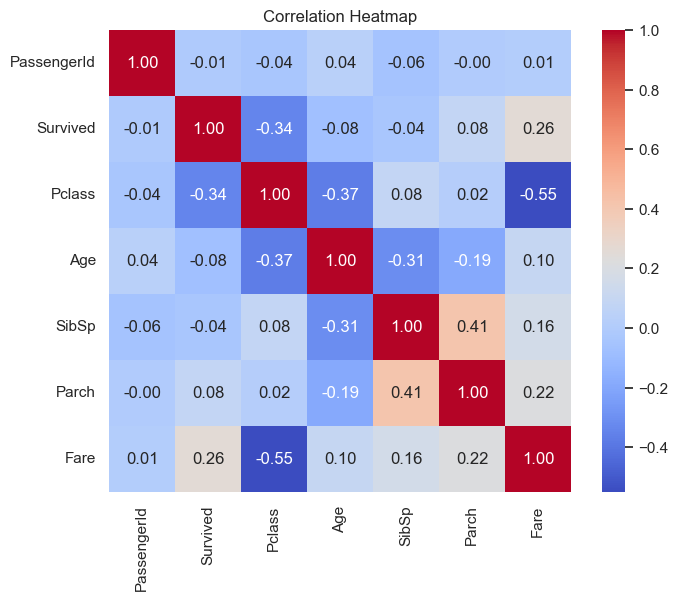

In [33]:
corr = df.select_dtypes('number').corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


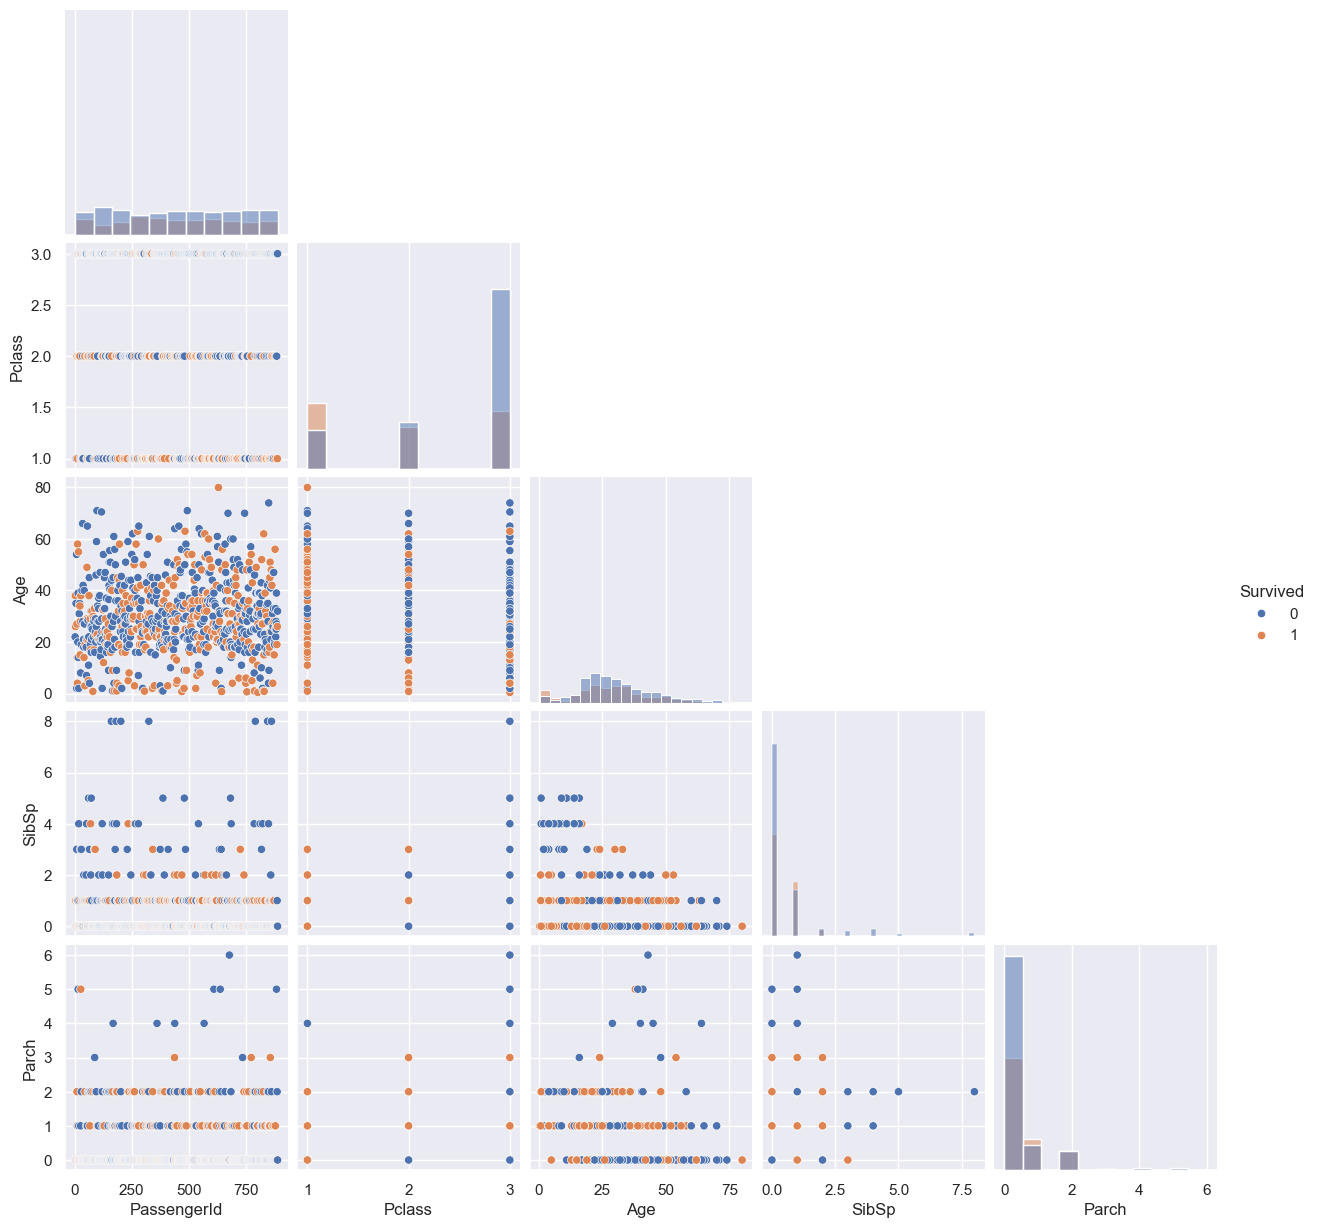

In [34]:
pp_cols = [c for c in df.select_dtypes('number').columns if df[c].nunique()>2][:5]
sns.pairplot(df[pp_cols + ([target] if target else [])], hue=target if target else None,
             corner=True, diag_kind='hist')
plt.show()


In [35]:
print("Skewness:\n", df[num_cols].skew(numeric_only=True).sort_values(ascending=False))

def iqr_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, up = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((s < low) | (s > up)).sum()

outliers = {c: iqr_outliers(df[c].dropna()) for c in num_cols}
pd.Series(outliers).sort_values(ascending=False)


Skewness:
 Fare           4.787317
SibSp          3.695352
Parch          2.749117
Survived       0.478523
Age            0.389108
PassengerId    0.000000
Pclass        -0.630548
dtype: float64


Parch          213
Fare           116
SibSp           46
Age             11
Pclass           0
PassengerId      0
Survived         0
dtype: int64

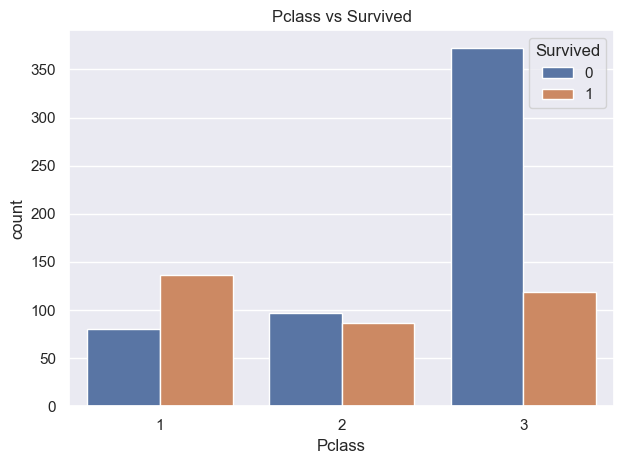

In [36]:
# Example: save last plot; repeat as needed
plt.figure()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Pclass vs Survived")
plt.tight_layout()
plt.savefig("pclass_vs_survived.png", dpi=150)
plt.show()
